In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import beta

In [2]:
def generateDataset(number_of_persons=100, probabilities=[1]):
    probabilities = np.array(probabilities)
    number_of_candys = np.size(probabilities)
    tmp_data = []
    for _ in range(number_of_persons):
        random_pick = np.random.uniform(size=number_of_candys)
        tmp_data.append(np.where(probabilities > random_pick, 1, 0))

    df = pd.DataFrame(tmp_data)
    return df.apply(pd.to_numeric)

In [3]:
def plot_distributions(number_of_reward_0,number_of_reward_1):
    plt.figure()
    x = np.linspace(0, 1, 1002)[1:-1]
    for i in range(len(number_of_reward_0)):
        dist = beta(number_of_reward_1[i] + 1, number_of_reward_0[i]+1)
        y = dist.pdf(x)

        plt.plot(x,y, label=f"Candy {i + 1} - E[x]={dist.mean():.2f}")
        plt.legend()

Total reward: 72
Actual value: 0.10, Predicted: 0.20
Actual value: 0.13, Predicted: 0.33
Actual value: 0.23, Predicted: 0.38
Actual value: 0.77, Predicted: 0.79


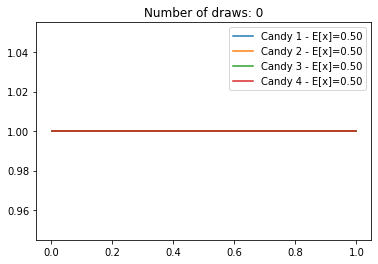

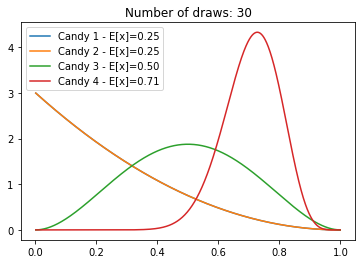

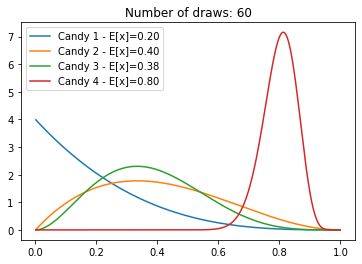

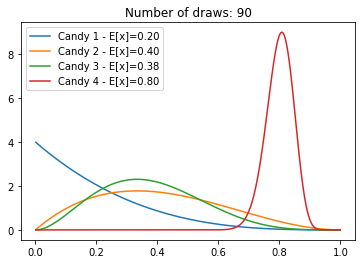

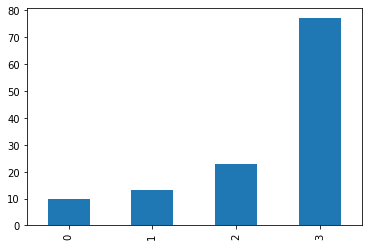

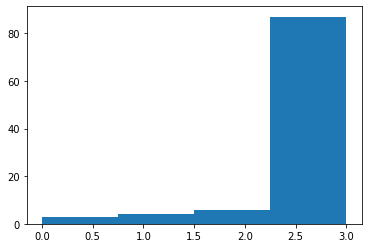

In [11]:
probs = [0.1, 0.2, 0.3, 0.8]
dataset = generateDataset(number_of_persons=100, probabilities=probs)

number_of_candy = dataset.shape[1]
number_of_persons = dataset.shape[0]

number_of_reward_1 = [0]*number_of_candy
number_of_reward_0 = [0]*number_of_candy
total_reward = 0
theta = [0]*number_of_candy
candy_selected = []


for n in range(number_of_persons):

    if n%30 == 0:
        plot_distributions(number_of_reward_0, number_of_reward_1)
        plt.title(f"Number of draws: {n}")

    for i in range(number_of_candy):
        theta[i] = np.random.beta(
            number_of_reward_1[i] + 1, number_of_reward_0[i]+1)

    highest_probability_candy = np.argmax(theta)
    candy_selected.append(highest_probability_candy)
    reward = dataset.iloc[n, highest_probability_candy]
    if reward == 1:
        number_of_reward_1[highest_probability_candy] += 1
    elif reward == 0:
        number_of_reward_0[highest_probability_candy] += 1
    total_reward += reward

    


plt.figure()
dataset.sum().plot.bar()
print(f"Total reward: {total_reward}")
plt.figure()
plt.hist(candy_selected, bins=number_of_candy)

for i in range(number_of_candy):
    mean_candy = dataset.mean()[i]
    dist = beta(number_of_reward_1[i] + 1, number_of_reward_0[i]+1)
    expected_candy = dist.mean()
    print(f"Actual value: {mean_candy:.2f}, Predicted: {expected_candy:.2f}")

34


(array([22., 36., 19., 23.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

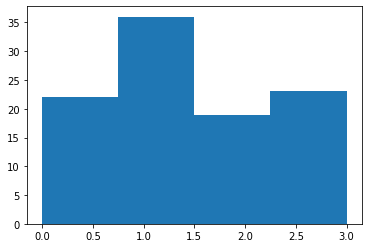

In [15]:

candy_selected = []
total_reward = 0
number_of_candy = 4
for n in range(number_of_persons):
    candy_color = np.random.randint(number_of_candy)
    candy_selected.append(candy_color)
    reward = dataset.values[n, candy_color]
    total_reward += reward
print(total_reward)
plt.hist(candy_selected, bins=number_of_candy)